In [8]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [88]:
loan_data = pd.read_csv('loanData.csv')

In [85]:
loan_data[:3]

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001002,Male,41,No,0,Graduate,No,73,5849,67,0.0,1.0,1646,Urban,1,1,3120,26,1
1,LA001003,Male,25,Yes,1,Graduate,No,49,4583,54,1508.0,1.0,6237,Rural,3,4,9216,33,0
2,LA001005,Male,48,Yes,0,Graduate,Yes,35,3000,33,0.0,1.0,1442,Urban,2,4,1584,36,1


In [52]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [54]:
loan_data['married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [55]:
loan_data['dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [56]:
loan_data['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [57]:
loan_data['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [58]:
loan_data['business_type'].unique()

array([73, 49, 35, 45, 20, 70,  9, 76, 61,  4, 81,  3, 89, 71, 46, 78, 84,
       54,  6, 86, 68, 33, 65, 48, 58, 38, 93, 99, 95, 28, 74, 16, 12, 19,
       85,  1, 10, 37, 55, 62, 53, 11, 83, 43, 80, 27, 98, 34, 52, 72, 30,
       22, 47, 31, 96, 88, 25, 15, 75, 79, 57, 23, 82,  7,  8, 60, 18, 51,
       66, 32, 26, 91, 64, 40, 17, 87, 14, 63, 24, 59, 13,  2, 36, 90, 67,
       94, 41, 21, 50, 69, 97, 56, 44, 92, 29, 42,  5, 77], dtype=int64)

In [59]:
loan_data['credit_history'].unique()

array([ 1.,  0., nan])

In [60]:
loan_data['property_area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

## Mark Data & normalize

In [61]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [79]:
gendr_mapping = {'Male': 1, 'Female': 0, np.nan: -1}

In [71]:
loan_data['married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [72]:
married_mapping = {'No': 0, 'Yes': 1, np.nan: -1}

In [73]:
loan_data['dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [74]:
dep_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3, np.nan: -1}

In [75]:
loan_data['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [76]:
edu_mappiong = {'Graduate': 1, 'Not Graduate': 0}

In [77]:
loan_data['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [78]:
emp_mapping = {'No': 0, 'Yes': 1, np.nan: -1}

In [82]:
loan_data['property_area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [83]:
prop_mapping = {'Urban': 1, 'Rural': 3, 'Semiurban': 2}

In [89]:
loan_data = loan_data.replace({'gender': gendr_mapping,
                               'married': married_mapping,
                               'dependents': dep_mapping,
                               'education': edu_mappiong,
                               'self_employed': emp_mapping,
                               'property_area': prop_mapping
                              })

In [93]:
loan_data[:3]

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001002,1,41,0,0,1,0,73,5849,67,0.0,1.0,1646,1,1,1,3120,26,1
1,LA001003,1,25,1,1,1,0,49,4583,54,1508.0,1.0,6237,3,3,4,9216,33,0
2,LA001005,1,48,1,0,1,1,35,3000,33,0.0,1.0,1442,1,2,4,1584,36,1


# Train Test Split

In [94]:
# id 제외
X = loan_data.loc[:, 'gender':'loan_term']

In [95]:
y = loan_data.loc[:, 'loan_status']

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train Model

In [99]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [100]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

In [101]:
calculate_accuracy(model, x_test, y_test)

Accuracy: 94.31%


0.943089430894309

# Improving Models

In [137]:
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.04,
    n_estimators=50,
    reg_alpha =0.45,
    reg_lambda=0.6
)
model.fit(x_train, y_train)

print(model.evals_result)
calculate_accuracy(model, x_test, y_test)

<bound method XGBClassifier.evals_result of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.04, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.45, reg_lambda=0.6, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>
Accuracy: 95.12%


0.9512195121951219

# show XAI

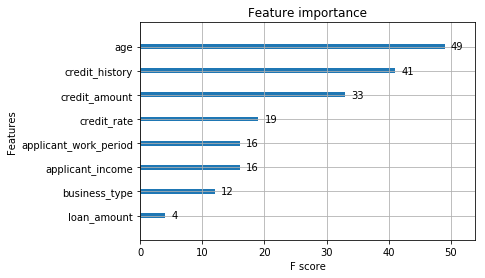

In [154]:
import xgboost
xgboost.plot_importance(model)

In [139]:
import shap

In [142]:
x_train.iloc[1, :]

gender                      1.0
age                        25.0
married                     1.0
dependents                  1.0
education                   1.0
self_employed               0.0
business_type               8.0
applicant_income         3052.0
applicant_work_period      62.0
coapplicant_income       1030.0
credit_history              1.0
credit_amount             616.0
property_area               1.0
property_type               3.0
credit_rate                 2.0
loan_amount              1800.0
loan_term                  40.0
Name: 105, dtype: float64

In [144]:
idx = 13

In [145]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [146]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, x_train)

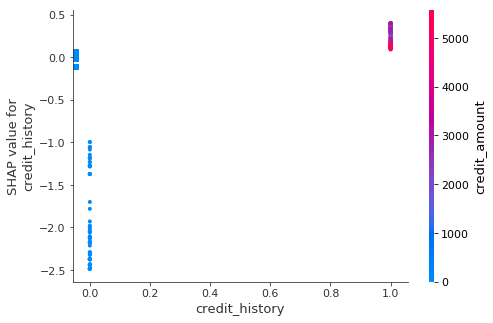

In [150]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("credit_history", shap_values, x_train)

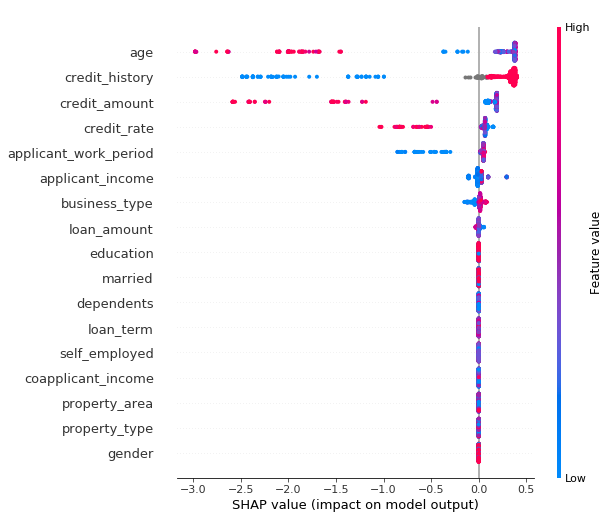

In [151]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

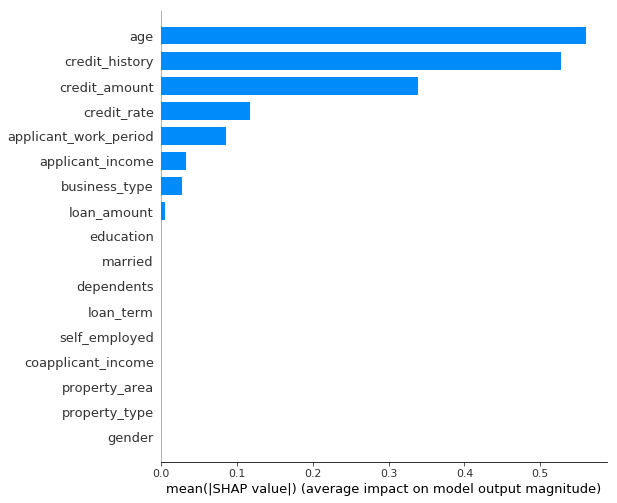

In [152]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

# plot Tree

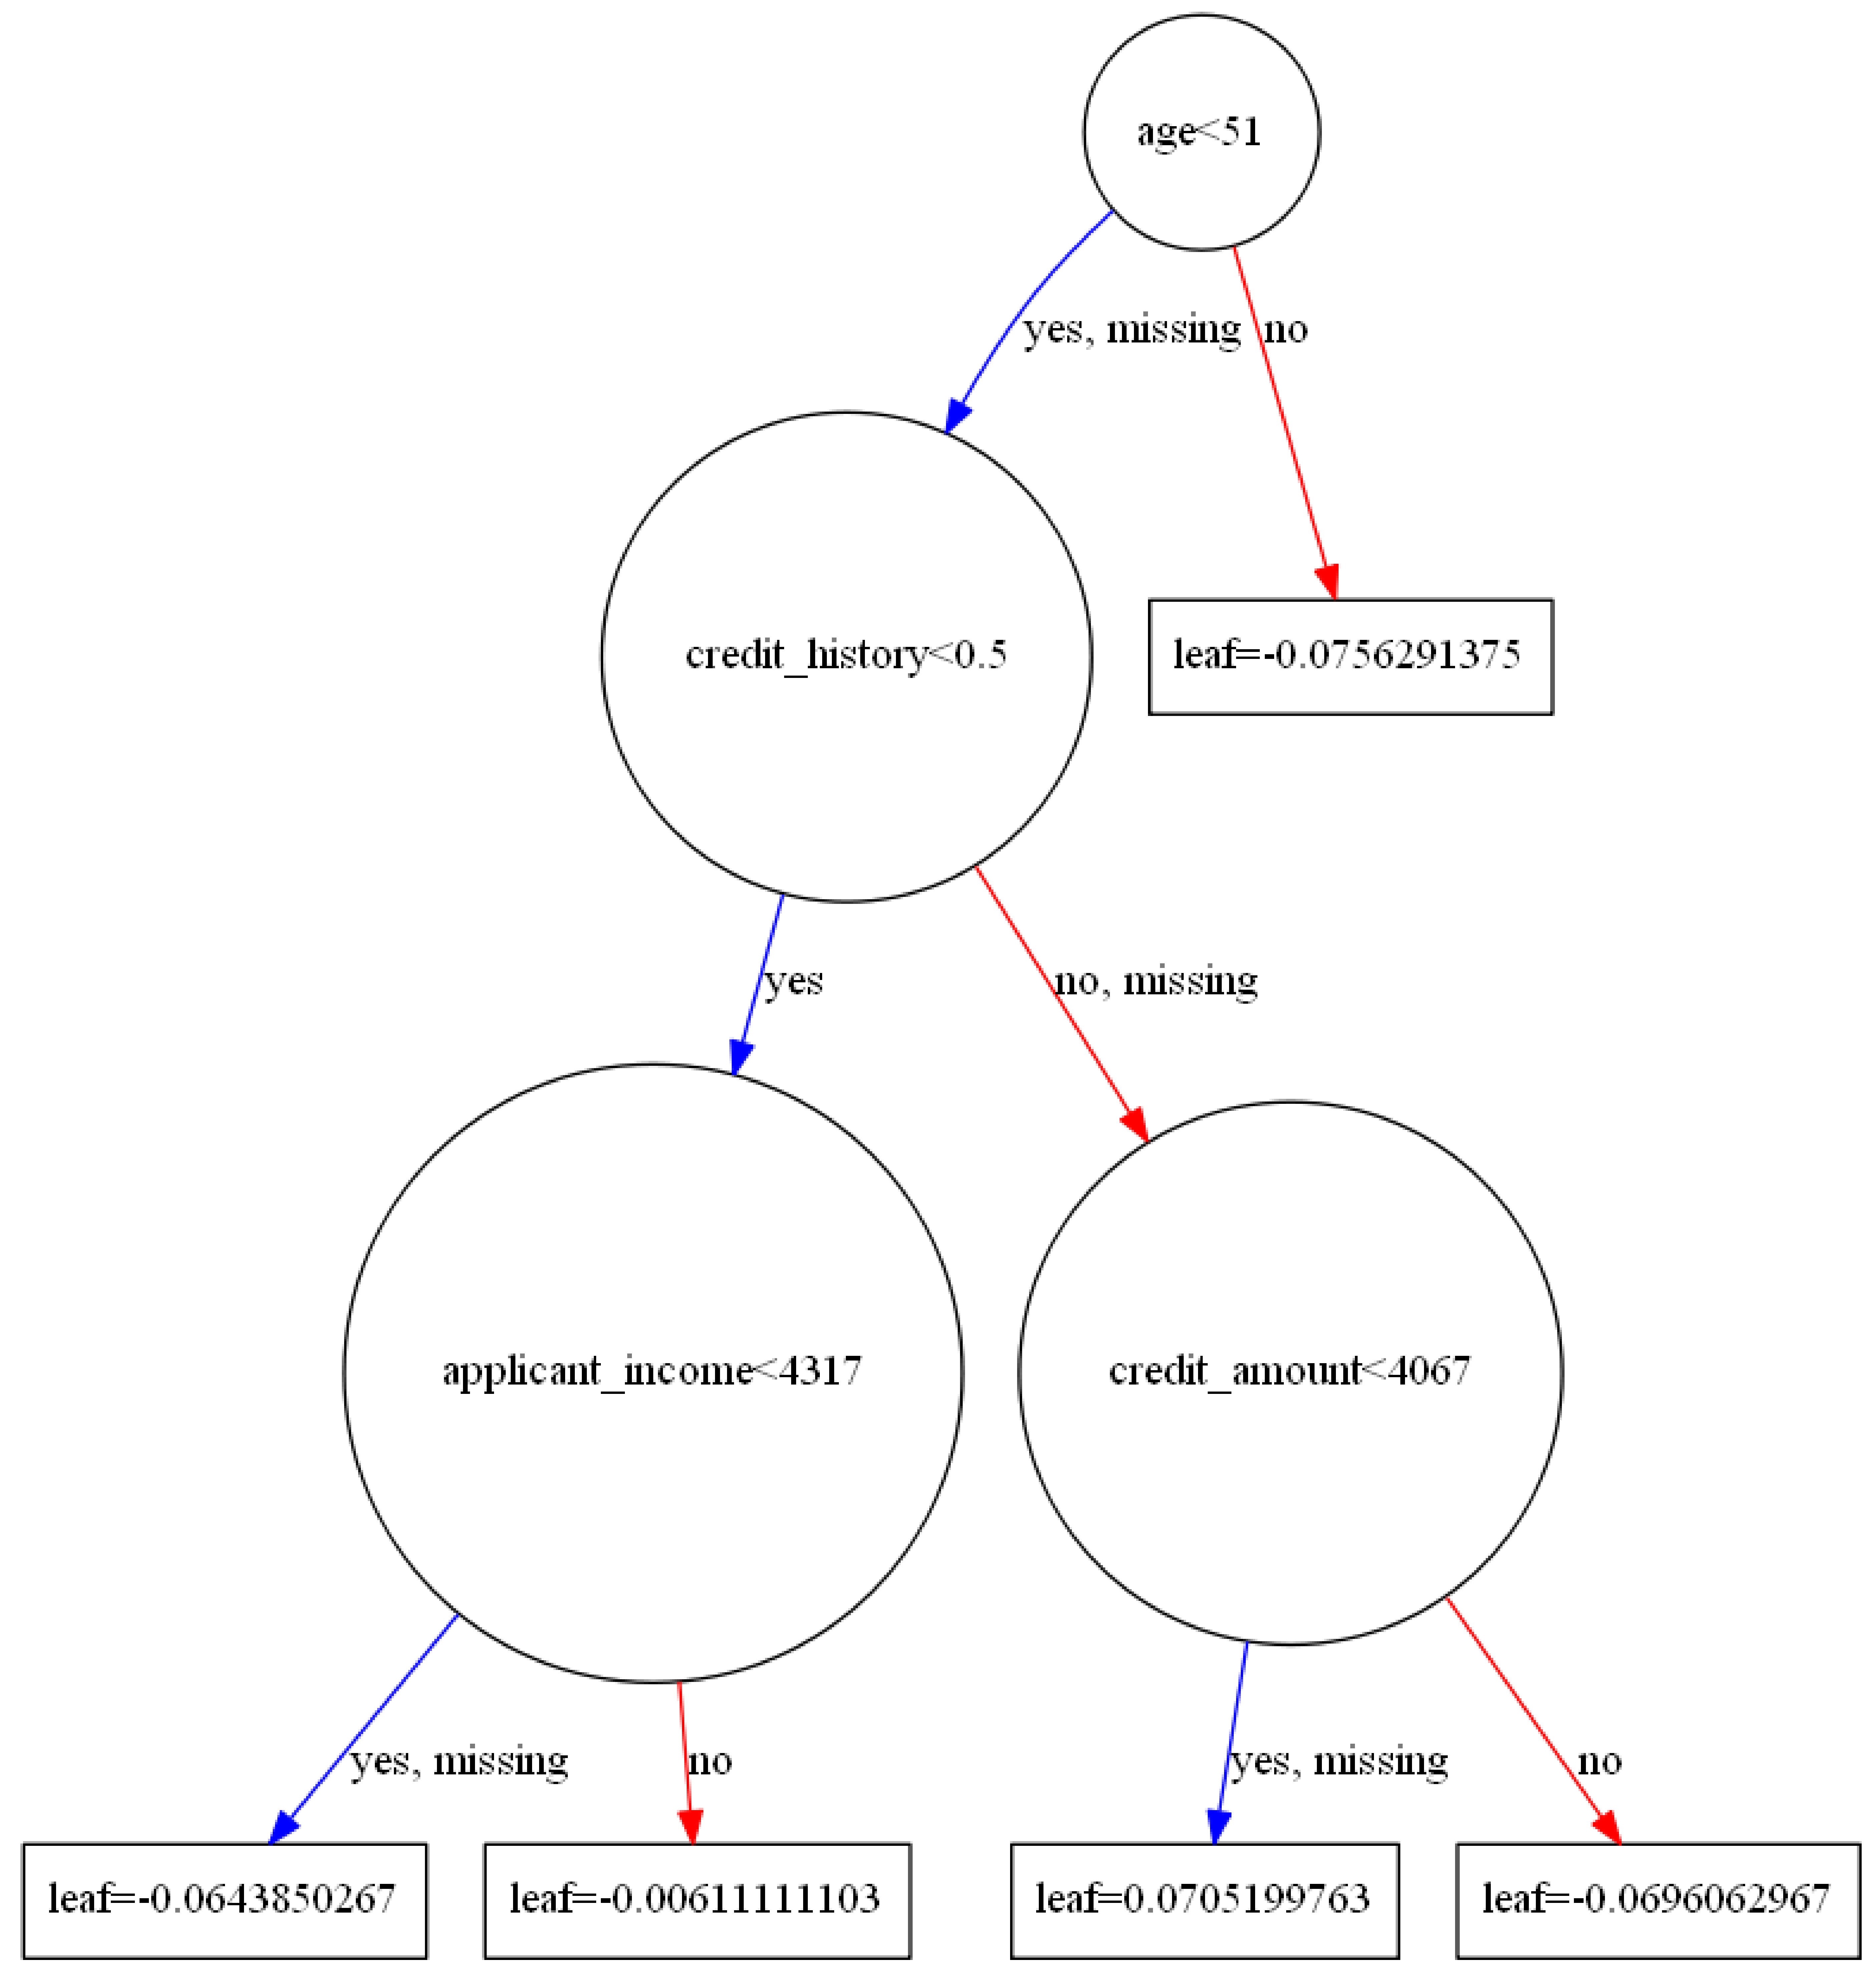

In [155]:
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt

from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 100,200

plot_tree(model)
plt.show()

# Leaf value

https://stackoverflow.com/questions/40926340/what-does-the-value-of-leaf-in-the-following-xgboost-model-tree-diagram-means

For a classification tree with 2 classes {0,1}, the value of the leaf node represent the raw score for class 1. It can be converted to a probability score by using the logistic function. The calculation below use the left most leaf as an example.

1/(1+np.exp(-1*0.167528))=0.5417843204057448
What this means is if a data point ends up being distributed to this leaf, the probability of this data point being class 1 is 0.5417843204057448.

In [156]:
def print_prob(leaf_value):
    result = 1/(1+np.exp(-1*leaf_value))
    print('{:.2%}'.format(result))
    return result

In [157]:
print_prob(-0.064385)

48.39%


0.48390930818332867